In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import platform
import psutil
from scipy.stats import poisson
from scipy.spatial import KDTree


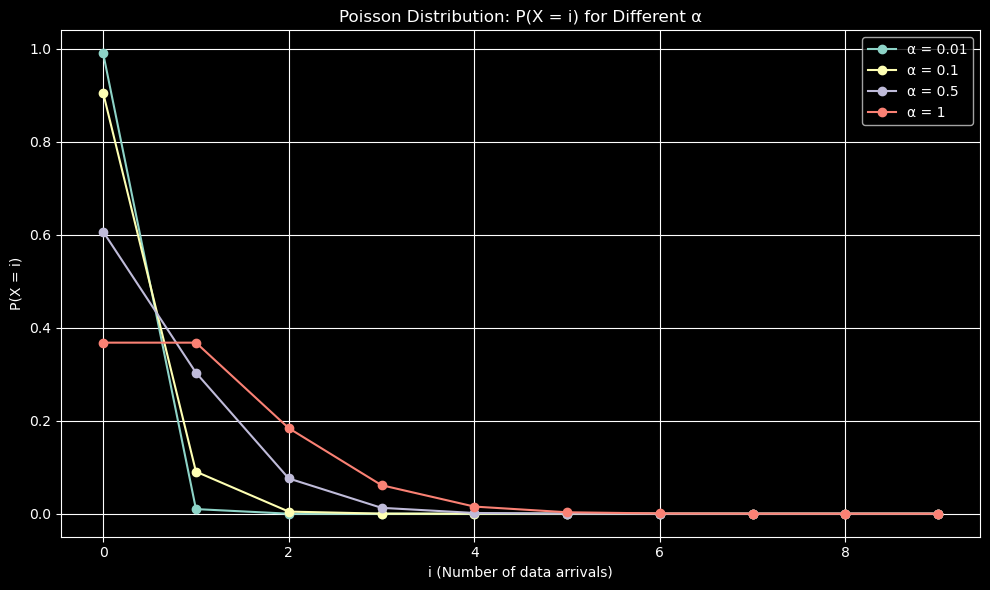

In [10]:
# Task 1

# Define values for alpha and range for X (i)
alpha_values = [0.01, 0.1, 0.5, 1]
i_values = np.arange(0, 10)

plt.figure(figsize=(10, 6))

# Plot Poisson PMF for each alpha
for alpha in alpha_values:
    lam = alpha
    pmf_values = poisson.pmf(i_values, mu=lam)
    plt.plot(i_values, pmf_values, marker='o', label=f'α = {alpha}')

plt.title('Poisson Distribution: P(X = i) for Different α')
plt.xlabel('i (Number of data arrivals)')
plt.ylabel('P(X = i)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#task 2

# Parameters
alpha = 0.5      
delta_t = 1      
lam = alpha * delta_t
num_samples = 100  

# Sample data arrivals from Poisson distribution
samples = np.random.poisson(lam=lam, size=num_samples)

print(samples)


[1 0 1 0 0 0 0 0 1 0 0 1 2 1 0 2 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 2 3 0 0 0 0 1 1 0 0 2 1 1 0 1 0 0 0 0 1]


In [12]:
#task 3
def simulate_queue(lmbda, process_time, time_steps=2000):
    queue = []
    waiting_lengths = []

    for t in range(time_steps):
        incoming = np.random.poisson(lmbda)                  # 1. Incoming jobs sampled from Poisson
        queue.extend([process_time] * incoming)              # 2. Each job needs `process_time` steps

        if queue:
            queue[0] -= 1                                    # 3. Decrement the processing time of the current job
            if queue[0] <= 0:
                queue.pop(0)                                 # 4. Remove job if finished

        waiting_lengths.append(len(queue))                   # 5. Record queue length

    return np.mean(waiting_lengths)
avg_wait_length = simulate_queue(0.1, 4)
print(f"Average waiting list length (λ=0.1, processing=4): {avg_wait_length:.2f}")

Average waiting list length (λ=0.1, processing=4): 0.36


In [13]:
#task 4
def run_experiments(lambdas, process_time, time_steps=2000, num_samples=200):
    avg_lengths = []

    for lmbda in lambdas:
        all_runs = [simulate_queue(lmbda, process_time, time_steps) for _ in range(num_samples)]
        avg_over_runs = np.mean(all_runs)
        avg_lengths.append(avg_over_runs)
    return avg_lengths

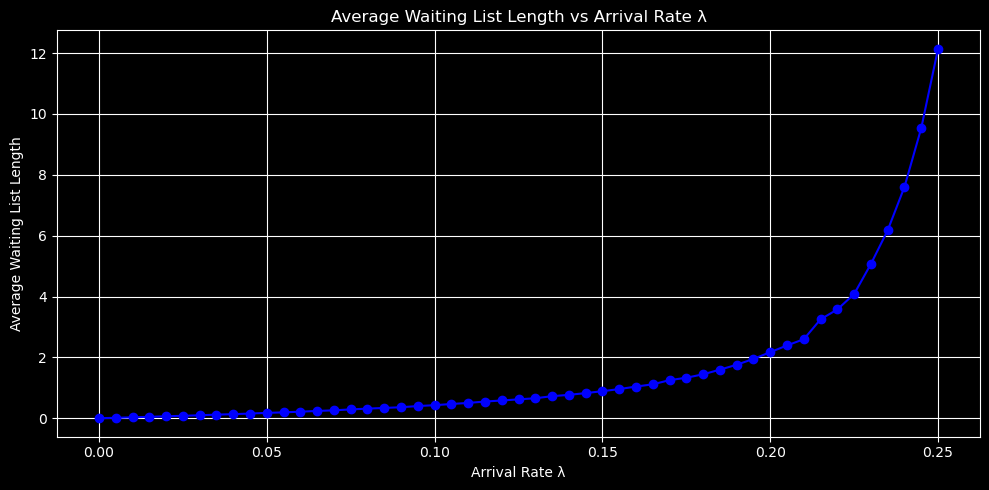

In [14]:

# Define λ range from 0 to 0.25 in steps of 0.005
lambdas = np.arange(0, 0.255, 0.005)
process_time = 4
num_samples = 200

# Run the simulation
average_lengths = run_experiments(lambdas, process_time, num_samples=num_samples)

# Plotting the result
plt.figure(figsize=(10, 5))
plt.plot(lambdas, average_lengths, marker='o', linestyle='-', color='blue')
plt.title("Average Waiting List Length vs Arrival Rate λ")
plt.xlabel("Arrival Rate λ")
plt.ylabel("Average Waiting List Length")
plt.grid(True)
plt.tight_layout()
plt.show()

## System Behavior Based on Arrival Rate (λ)

### Low Arrival Rate (λ < 0.1)

- Data arrives slowly.
- The system has more than enough capacity to handle jobs.
- The queue is mostly empty → average waiting list is near 0.

### Moderate Arrival Rate (λ ~ 0.15)

- Jobs start arriving more frequently.
- Queue begins to grow slightly, but the system still manages.

### High Arrival Rate (λ → 0.25)

- This approaches the maximum capacity of the server.
- **Note:** If each job takes 4 steps, the server can only process **0.25 jobs per step**.
- Beyond this point, the server can't keep up, so jobs pile up.
- The queue grows rapidly → exponential growth in the waiting list.


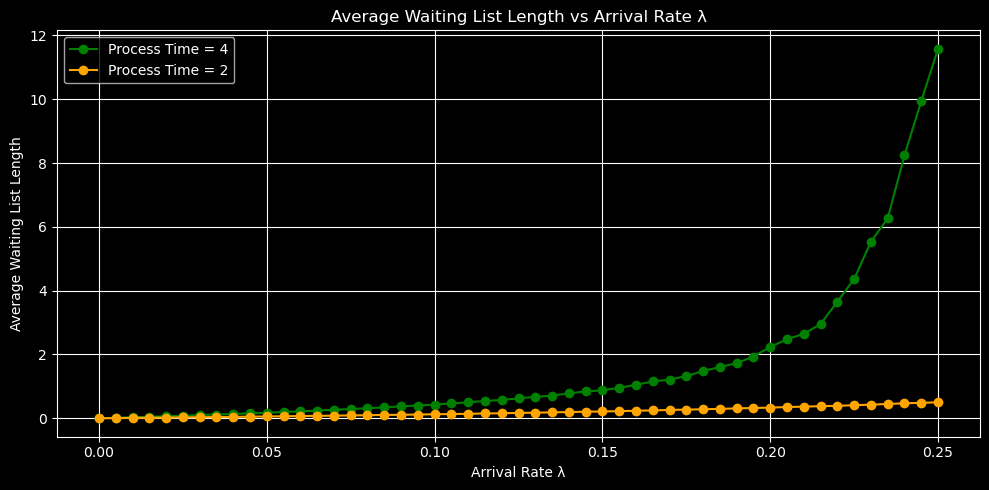

In [15]:
# task 5
# Run for process time = 4
avg_lengths_4 = run_experiments(lambdas, process_time=4, num_samples=num_samples)

# Run for process time = 2
avg_lengths_2 = run_experiments(lambdas, process_time=2, num_samples=num_samples)

# Plot both for comparison
plt.figure(figsize=(10, 5))
plt.plot(lambdas, avg_lengths_4, marker='o', linestyle='-', color='green', label='Process Time = 4')
plt.plot(lambdas, avg_lengths_2, marker='o', linestyle='-', color='orange', label='Process Time = 2')
plt.title("Average Waiting List Length vs Arrival Rate λ")
plt.xlabel("Arrival Rate λ")
plt.ylabel("Average Waiting List Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparison of Queue Behavior for Different Process Times

###  Key Differences

1. **System Capacity Threshold**:
   - With **Process Time = 4**, the system hits its maximum capacity at **λ = 0.25**, leading to an **exponential growth** in the queue length.
   - With **Process Time = 2**, the server can handle up to **λ = 0.5**, so the queue remains **stable and short** throughout the tested range (λ ≤ 0.25).

2. **Queue Growth Behavior**:
   - For **Process Time = 4**, as λ increases past ~0.20, the queue length starts growing **rapidly**, reaching over **12 jobs on average** at λ = 0.25.
   - For **Process Time = 2**, even at the highest λ tested (0.25), the average queue length stays **well below 1**, indicating a highly efficient and stable system.

###  Conclusion

- **Faster processing** (2 steps/job) provides significantly better queue control and system throughput.
- The graph clearly illustrates the importance of **processing speed** in preventing queue buildup as arrival rates increase.


## TASK 2

Running simulation for r = 0.05
Running simulation for r = 0.1
Running simulation for r = 0.5
Running simulation for r = 1.4


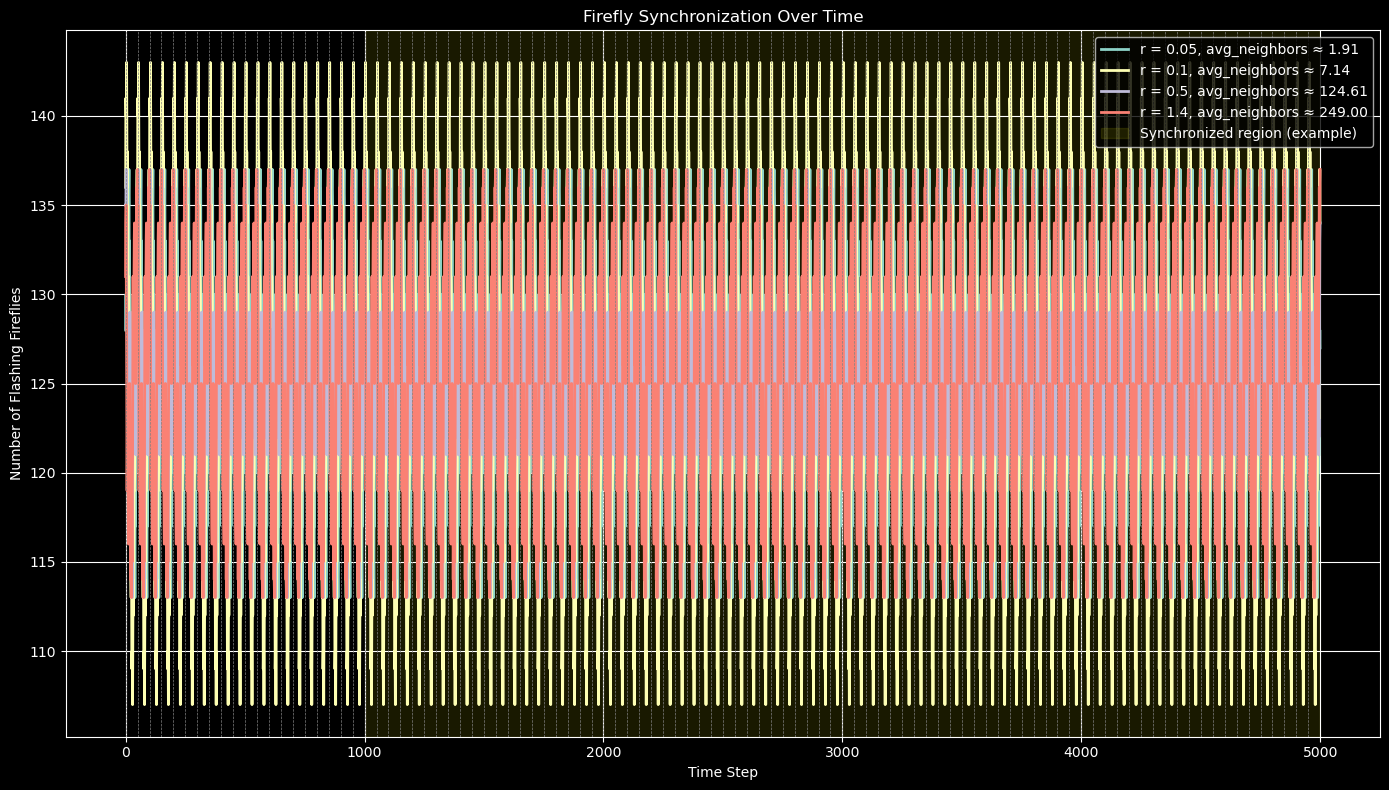

In [16]:

output_dir = "Assignments/CRA1/output"
output_path = os.path.join(output_dir, "firefly_synchronization.png")
os.makedirs(output_dir, exist_ok=True)

# --------------------------
# Parameters
# --------------------------
N = 250                      # Number of fireflies
L = 50                       # Flashing cycle length
T = 5000                     # Number of simulation time steps
r_values = [0.05, 0.1, 0.5, 1.4]  # Vicinity distances

# --------------------------
# Initialize firefly positions (randomly in 1x1 square)
# --------------------------
positions = np.random.rand(N, 2)  # Each row = (x, y)

# --------------------------
# Get neighbors within distance r
# --------------------------
def compute_neighbors(r):
    neighbors = [[] for _ in range(N)]
    for i in range(N):
        for j in range(i + 1, N):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < r:
                neighbors[i].append(j)
                neighbors[j].append(i)
    avg_neighbors = np.mean([len(nlist) for nlist in neighbors])
    return neighbors, avg_neighbors

# --------------------------
# Simulate firefly behavior for a given r
# --------------------------
def run_simulation(r):
    neighbors, avg_neighbors = compute_neighbors(r)
    clocks = np.random.randint(0, L, size=N)  # Random initial phases
    flash_counts = []

    for t in range(T):
        is_flashing = clocks < (L // 2)
        flash_counts.append(np.sum(is_flashing))

        new_clocks = (clocks + 1) % L  # Default clock advance

        for i in range(N):
            if not is_flashing[i] and neighbors[i]:
                flashing_neighbors = np.sum(is_flashing[neighbors[i]])
                if flashing_neighbors > len(neighbors[i]) / 2:
                    # Advance clock by 1 (i.e., flash 1 step earlier next cycle)
                    new_clocks[i] = (clocks[i] + 1) % L

        clocks = new_clocks  # Update clocks

    return flash_counts, avg_neighbors

# --------------------------
# Run simulation for all r values and plot
# --------------------------
plt.figure(figsize=(14, 8))

for r in r_values:
    print(f"Running simulation for r = {r}")
    flash_counts, avg_neighbors = run_simulation(r)
    plt.plot(flash_counts, linewidth=2, label=f"r = {r}, avg_neighbors ≈ {avg_neighbors:.2f}")

# Add vertical dashed lines every L steps
for cycle_start in range(0, T, L):
    plt.axvline(x=cycle_start, color='gray', linestyle='--', linewidth=0.5)

# Optional: Highlight region where synchronization is visible
# You can change 1000 to another time where you notice stable peaks
plt.axvspan(1000, 5000, color='yellow', alpha=0.1, label='Synchronized region (example)')

# --------------------------
# Plot settings
# --------------------------
plt.title("Firefly Synchronization Over Time")
plt.xlabel("Time Step")
plt.ylabel("Number of Flashing Fireflies")
plt.legend()
plt.grid(True)
plt.tight_layout()

# --------------------------
# Save and show plot
# --------------------------
plt.savefig(output_dir, dpi=300)
plt.show()


Running amplitude analysis...
r = 0.025, Avg amplitude = 13.88
r = 0.275, Avg amplitude = 13.78
r = 0.525, Avg amplitude = 12.96
r = 0.775, Avg amplitude = 13.08
r = 1.025, Avg amplitude = 13.60
r = 1.275, Avg amplitude = 14.34


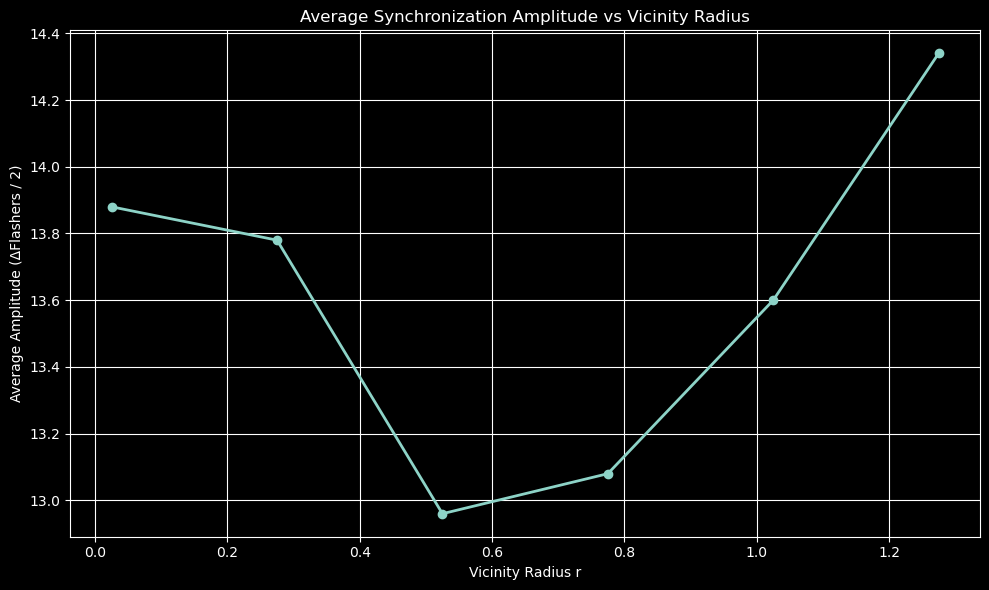


--- Execution Summary ---
Execution Time: 305.77 seconds
System Architecture: arm64
CPU: arm
Total RAM: 8.0 GB


In [ ]:
import os
import time
import platform
import psutil
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Start timer
# -------------------------
start_time = time.time()

# -------------------------
# Output path
# -------------------------

output_dir = "Assignments/CRA1/output"
output_path = os.path.join(output_dir, "Synchronization_Amplitude_vs_Vicinity_Radius.png")
os.makedirs(output_dir, exist_ok=True)

# -------------------------
# Parameters
# -------------------------
N = 250
L = 50
T = 1000
r_values = np.arange(0.000, 1.5, 0.25)
num_runs = 50

# -------------------------
# Generate firefly positions once for each run
# -------------------------
def generate_positions():
    return np.random.rand(N, 2)

# -------------------------
# Compute neighbors
# -------------------------
def compute_neighbors(positions, r):
    neighbors = [[] for _ in range(N)]
    for i in range(N):
        for j in range(i + 1, N):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < r:
                neighbors[i].append(j)
                neighbors[j].append(i)
    return neighbors

# -------------------------
# Run one simulation, return last cycle flash counts
# -------------------------
def run_simulation(positions, r):
    neighbors = compute_neighbors(positions, r)
    clocks = np.random.randint(0, L, size=N)
    flash_counts = []

    for t in range(T):
        is_flashing = clocks < (L // 2)
        flash_counts.append(np.sum(is_flashing))
        new_clocks = (clocks + 1) % L
        for i in range(N):
            if not is_flashing[i] and neighbors[i]:
                flashing_neighbors = np.sum(is_flashing[neighbors[i]])
                if flashing_neighbors > len(neighbors[i]) / 2:
                    new_clocks[i] = (clocks[i] + 1) % L
        clocks = new_clocks

    return flash_counts[-L:]

# -------------------------
# Main experiment: compute avg amplitude per r
# -------------------------
avg_amplitudes = []

print("Running amplitude analysis...")

for r in r_values:
    amplitudes = []
    for _ in range(num_runs):
        positions = generate_positions()
        last_cycle = run_simulation(positions, r)
        amp = (max(last_cycle) - min(last_cycle)) / 2
        amplitudes.append(amp)
    avg_amp = np.mean(amplitudes)
    avg_amplitudes.append(avg_amp)
    print(f"r = {r:.3f}, Avg amplitude = {avg_amp:.2f}")

# -------------------------
# Plot average amplitudes vs r
# -------------------------
plt.figure(figsize=(10, 6))
plt.plot(r_values, avg_amplitudes, marker='o', linewidth=2)
plt.title("Average Synchronization Amplitude vs Vicinity Radius")
plt.xlabel("Vicinity Radius r")
plt.ylabel("Average Amplitude (ΔFlashers / 2)")
plt.grid(True)
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# -------------------------
# End timer and print system info
# -------------------------
end_time = time.time()
exec_time = end_time - start_time

print("\n--- Execution Summary ---")
print(f"Execution Time: {exec_time:.2f} seconds")
print(f"System Architecture: {platform.machine()}")
print(f"CPU: {platform.processor() or platform.uname().processor}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024 ** 3), 2)} GB")